# Bezoekers in een pretpark
Een pretpark wil kunnen voorspellen hoeveel bezoekers er zullen komen in een bepaalde maand. Daarvoor hebben ze gedurende 4 jaar opgeschreven hoeveel bezoekers er waren, voor iedere maand. Je vindt deze data in “pretpark.csv”.  Deze data is ook direct leesbaar in Python (geen foute of ontbrekende data). Je moet wel zorgen dat de kolom `aantal_bezoekers` een float wordt.

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

pretpark = pd.read_csv('data/pretpark.csv', sep=';')
pretpark['aantal_bezoekers'] = pretpark['aantal_bezoekers'].astype(float)

display(pretpark)

,jaar,maand,aantal_bezoekers
0,1,1,120.0
1,1,2,89.0
2,1,3,492.0
3,1,4,586.0
4,1,5,1300.0
5,1,6,1173.0
6,1,7,1688.0
7,1,8,1715.0
8,1,9,528.0
9,1,10,247.0


1.	Maak een grafiek van de data. Wat merk je visueel op? Stijgt of daalt het aantal bezoekers? Is er een patroon herkenbaar?

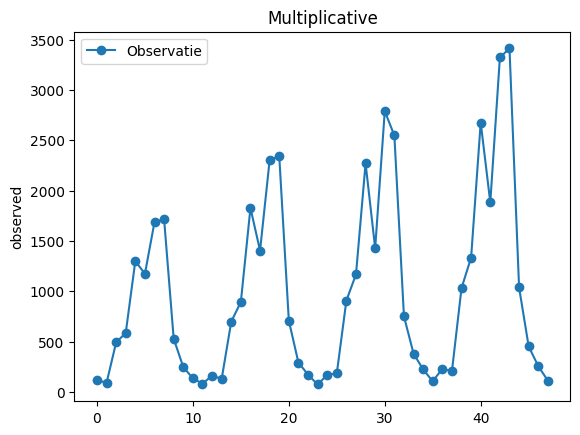

In [191]:
# Maak een grafiek van de data.

aantal_bezoekers = pretpark['aantal_bezoekers'] # Data

sd_model = seasonal_decompose(aantal_bezoekers, model='multiplicative', period=4)
fig, axes = plt.subplots(nrows=1, ncols=1)

axes.plot(sd_model.observed, 'o-', label='Observatie')
axes.set_ylabel('observed')
axes.set_title('Multiplicative')
axes.legend()
plt.show()

# Wat merk je visueel op?
# Er zijn 4 verschillende piekmomenten rond maand 8 en het stijgt elk jaar.

# Stijgt of daalt het aantal bezoekers?
# Het stijgt elk jaar.

# Is er een patroon herkenbaar?
# Er zijn 4 piekmomenten rond maand 8 (Er zijn 4 verschillende seizoenen).

2.	Zou je het additief of multiplicatief model gebruiken?

In [192]:
# voer de decompositieanalyse uit op de tijdreeksgegevens

aantal_bezoekers = pretpark['aantal_bezoekers'] # Data

sd_model = seasonal_decompose(aantal_bezoekers, model='multiplicative', period=4)

# verkrijg de standaarddeviaties van de seizoens- en restcomponenten
seasonal_std = np.std(sd_model.seasonal)
residual_std = np.std(sd_model.resid)

# bereken de verhouding van de standaarddeviaties
std_ratio = seasonal_std / residual_std

# bepaal welk model geschikter is op basis van de verhouding van de standaarddeviaties
if std_ratio < 1:
    print("Het additieve model is geschikter.")
else:
    print("Het multiplicatieve model is geschikter.")

Het additieve model is geschikter.


3.	Wat is de grootte van 1 “seizoen”?

Seizoen grootte: [1]


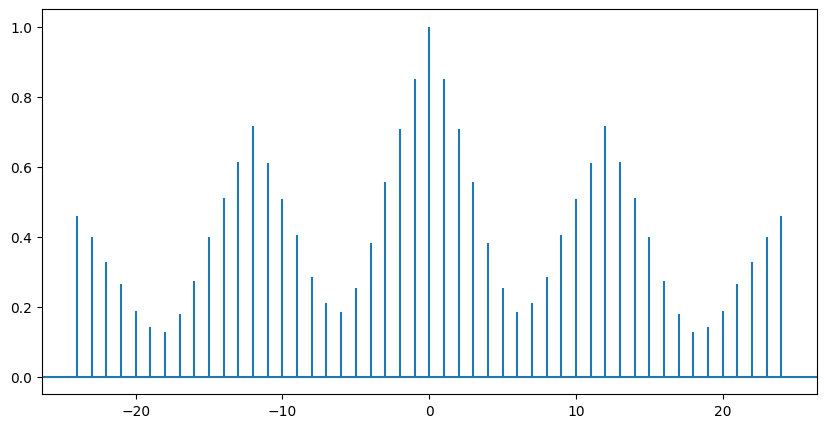

In [193]:
from W20P4.forecast import find_period

# De grootte van één "seizoen" in een tijdreeks is gelijk aan het aantal periodes waarin het patroon zich herhaalt.

aantal_bezoekers = pretpark['aantal_bezoekers'] # Data

seizoenGrootte = find_period(aantal_bezoekers, maxlags=24, top_n=1)
print("Seizoen grootte:", seizoenGrootte)

fig, ax = plt.subplots(figsize=(10, 5))
lags, acfs, _, _ = ax.acorr(aantal_bezoekers, maxlags=24)

4.	Doe nu een decompositie.  Plot deze in een diagram.

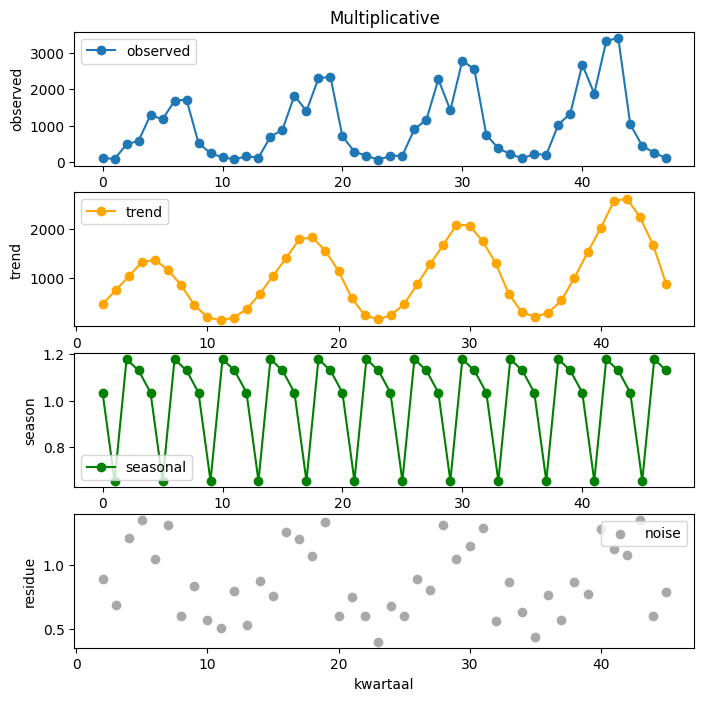

In [194]:
from W20P4.forecast import plot_seasonal_decompositon

plot_seasonal_decompositon(sd_model, 'Multiplicative')
# sd_model.observed
# sd_model.trend
# sd_model.seasonal
# sd_model.resid

5.	We gaan nu een model maken om voorspellingen te doen naar de toekomst. Doe een lineaire regressie op de trend en bepaal de slope en de intercept. Welke vergelijking vind je voor de trend?

In [195]:
from W20P4.forecast import GeneralRegression
from statsmodels.tsa.seasonal import seasonal_decompose

aantal_bezoekers = pretpark['aantal_bezoekers'] # Data

sd_model = seasonal_decompose(aantal_bezoekers, model='multiplicative', period=4)
data = sd_model.trend.dropna()

X = data.index.to_numpy()
y = data.to_numpy()

reg_model = GeneralRegression()
reg_model.fit(X, y)

print("Slope: ", reg_model.coef_)
print("Intercept: ", reg_model.intercept_)

Slope:  [ 0.         20.32499119]
Intercept:  591.9621388301621


6.	Bereken de waarden van de trend voor het komende jaar.  Welke waarden kom je uit?

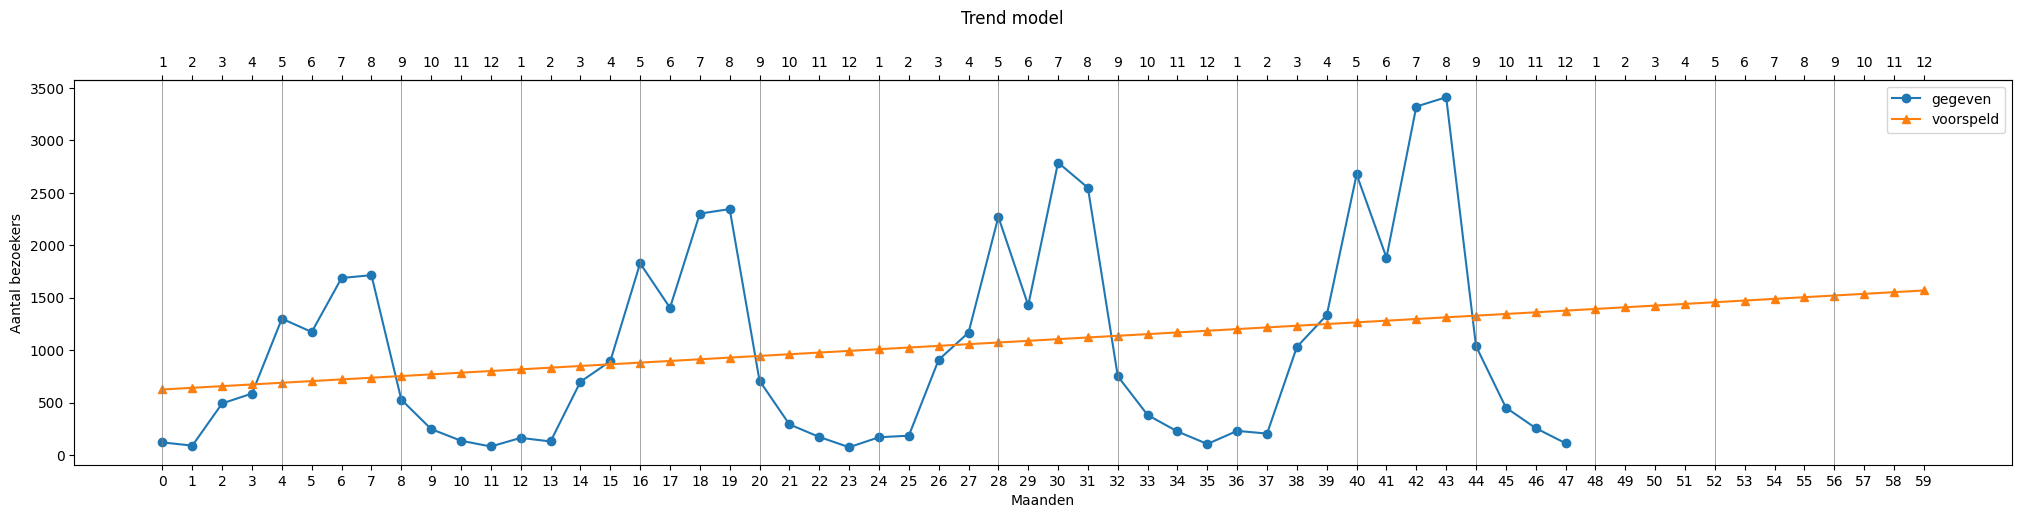

In [210]:
from W20P4.forecast import create_trend_model

def plot_trends(y1: np.array, y2=None, sub_title=None, label1='gegeven', label2='voorspeld', color='C0', ax=None):
    if y2 is not None:
        n = max(y1.size, y2.size)
    else:
        n = y1.size

    if not ax:
        fig, ax = plt.subplots(figsize=(25, 5))
    else:
        fig = ax.figure

    if sub_title:
        fig.suptitle(sub_title, y=1.02)

    ax.set_xlabel('Maanden')
    ax.set_ylabel('Aantal bezoekers')
    ax2 = ax.secondary_xaxis('top')
    ax2.set_xticks(range(n))
    ax2.set_xticklabels(['{}'.format(j % 12 + 1) for j in range(n)])

    ax.set_xticks(range(n))
    ax.plot(y1, label=label1, color=color, marker='o')
    if y2 is not None:
        ax.plot(y2, label=label2, color='C1', marker='^')
    for i in range(0, n, 4):
        ax.axvline(i, color='gray', linewidth=0.5)

    ax.legend()

aantal_bezoekers = pretpark['aantal_bezoekers'] # Data

predict_trend = create_trend_model(aantal_bezoekers)

plot_trends(aantal_bezoekers, predict_trend(np.arange(60)), 'Trend model')


trend_waarden = predict_trend(np.arange(60)) # Trend waarden

7.	Wat zijn de waarden van het seizoen?

In [230]:
from W20P4.forecast import linear_combination, predict

aantal_bezoekers = pretpark['aantal_bezoekers'] # Data


# seizoen = pd.DataFrame(predict(aantal_bezoekers, 48, 52, linear_combination)[48:], columns=['linear_combination'], index=range(48, 52)).transpose()
# print(seizoen)

seizoen_waarden = predict(aantal_bezoekers, 0, 60, linear_combination, 12) # m = 12

display(seizoen_waarden)

array([          nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
        249.14980917,  166.98290088,  955.59329228, 1377.93809354,
       2600.80543191, 1638.42333591, 3145.27471972, 3195.70472754,
        981.73423029,  313.98132973,  222.0633528 ,   61.65803959,
        191.46274962,  251.27938815, 1175.65166835, 1536.6350276 ,
       2824.01641131, 1402.77786963, 3322.29664825, 2749.28806139,
        823.18203143,  465.40214046,  298.25125915,  128.37491396,
        326.01728862,  239.90069636, 1168.95858701, 1510.3499479 ,
       3119.18605948, 2450.76136334, 3982.61736385, 4507.76557534,
       1474.71336181,  511.88794877,  289.40219413,  100.31614

8.	Vermenigvuldig de trend-waarden nu met het patroon. Je hebt nu een schatting van het aantal bezoekers voor het volgende jaar.  Welke waarden kom je uit (rond de waarden af op een geheel getal)?

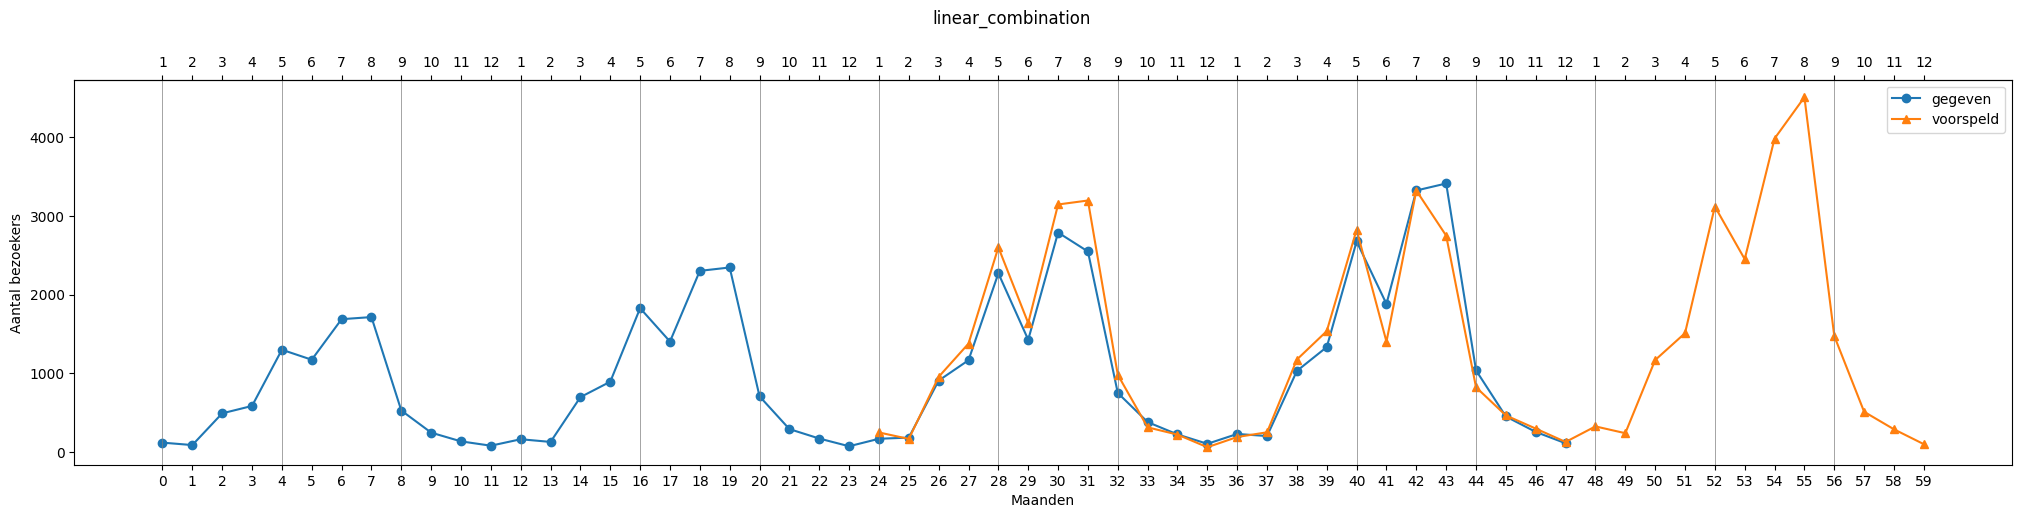

In [227]:
# seizoen_waarden = patroon

plot_trends(aantal_bezoekers, seizoen_waarden, 'linear_combination') # m = 12

9.	Wat is de MAE, RMSE en de MAPE? Wat is de betekenis van de MAPE?

In [235]:
from W20P4.forecast import forecast_errors

display(forecast_errors(aantal_bezoekers, predict_trend(np.arange(48)), 'Trend model'))

# MAPE staat voor Mean Absolute Percentage Error
# Het geeft aan in een percentage hoe groot de afwijking is tussen de geobserveerde informatie en de voorspelling.

,MAE,RMSE,MAPE
Trend model,762.289551,908.57489,2.473935
